In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_fraud = pd.read_csv('../data/processed_fraud_data.csv')
df_catrd_fraud = pd.read_csv('../data/processed_creditcard_data.csv')

In [10]:
df_fraud

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,time_since_signup_hours,lower_bound_ip_address,upper_bound_ip_address,country,transaction_frequency,transaction_count
0,22058,34,82414,2,0,1,39,73275836879972,0,2,5,1251.856111,1.677722e+08,1.677747e+07,11,4506682.0,1
1,333320,16,22225,0,0,0,53,350311387865908,0,1,0,4.984444,1.677747e+08,1.677773e+07,42,17944.0,1
2,1359,15,121068,2,3,1,53,262147382011095,1,18,3,0.000278,1.677773e+08,1.677824e+07,42,1.0,1
3,150084,44,3667,2,4,1,41,384054244391396,0,13,0,136.690278,1.677824e+08,1.677926e+07,11,492085.0,1
4,221365,39,63472,0,4,1,45,415583117452712,0,18,2,1211.516944,1.677926e+08,1.678131e+07,42,4361461.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138841,247696,44,22550,2,4,0,27,758375292292255,0,1,1,820.638056,3.758092e+10,3.758093e+09,92,2954297.0,1
138842,299384,35,105314,1,1,1,36,387782343463715,1,21,5,0.000278,3.758093e+10,3.758094e+09,95,1.0,1
138843,90291,18,18,2,0,1,48,223645389575165,0,12,2,1975.086389,3.758095e+10,3.758096e+09,42,7110311.0,1
138844,28946,52,44182,0,2,0,26,355990510713878,0,12,3,295.419167,3.758096e+10,3.758096e+09,188,1063509.0,1


### # Data Preparation

In [11]:
# Fraud Data
X_fraud = df_fraud.drop('class', axis=1)  # Features
y_fraud = df_fraud['class']  # Target

# Credit Card Fraud Data
X_card = df_catrd_fraud.drop('Class', axis=1)  # Features
y_card = df_catrd_fraud['Class']  # Target

In [12]:
# Train-Test Split
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(X_fraud, y_fraud, test_size=0.3, random_state=42, stratify=y_fraud)
X_card_train, X_card_test, y_card_train, y_card_test = train_test_split(X_card, y_card, test_size=0.3, random_state=42, stratify=y_card)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
# Function to train and evaluate models
def train_and_evaluate_model(X, y, dataset_name):
    print(f"\n--- Processing {dataset_name} ---")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    models = {
        "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
        "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
    }

    for model_name, model in models.items():
        print(f"\nTraining {model_name} on {dataset_name}...")
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        conf_matrix = confusion_matrix(y_test, y_pred)

        print(f"Performance metrics for {model_name} on {dataset_name}:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
        print(f"Confusion Matrix:\n{conf_matrix}")

# Example usage
train_and_evaluate_model(X_fraud, y_fraud, "Fraud Dataset")
train_and_evaluate_model(X_card_train, y_card_train, "Credit Card Fraud Dataset")


--- Processing Fraud Dataset ---

Training Logistic Regression on Fraud Dataset...
Performance metrics for Logistic Regression on Fraud Dataset:
Accuracy: 0.3837, Precision: 0.0961, Recall: 0.6645, F1 Score: 0.1679, ROC AUC: 0.5121
Confusion Matrix:
[[13390 24365]
 [ 1308  2591]]

Training Random Forest on Fraud Dataset...
Performance metrics for Random Forest on Fraud Dataset:
Accuracy: 0.9246, Precision: 0.6041, Recall: 0.5640, F1 Score: 0.5834, ROC AUC: 0.7742
Confusion Matrix:
[[36314  1441]
 [ 1700  2199]]

--- Processing Credit Card Fraud Dataset ---

Training Logistic Regression on Credit Card Fraud Dataset...
Performance metrics for Logistic Regression on Credit Card Fraud Dataset:
Accuracy: 0.9868, Precision: 0.1020, Recall: 0.8889, F1 Score: 0.1830, ROC AUC: 0.9595
Confusion Matrix:
[[58709   775]
 [   11    88]]

Training Random Forest on Credit Card Fraud Dataset...
Performance metrics for Random Forest on Credit Card Fraud Dataset:
Accuracy: 0.9996, Precision: 0.9140, Rec

In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
# Function to train and evaluate multiple models
def train_and_evaluate_models(X, y, dataset_name):
    print(f"\n--- Processing {dataset_name} ---")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define the models to evaluate
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
        "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "Support Vector Machine": SVC(probability=True, class_weight='balanced', random_state=42)
    }

    for model_name, model in models.items():
        print(f"\nTraining {model_name} on {dataset_name}...")
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        conf_matrix = confusion_matrix(y_test, y_pred)

        print(f"Performance metrics for {model_name} on {dataset_name}:")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
        print(f"Confusion Matrix:\n{conf_matrix}")

# Example usage
train_and_evaluate_models(X_fraud, y_fraud, "Fraud Dataset")
train_and_evaluate_models(X_card_train, y_card_train, "Credit Card Fraud Dataset")


--- Processing Fraud Dataset ---

Training Logistic Regression on Fraud Dataset...
Performance metrics for Logistic Regression on Fraud Dataset:
Accuracy: 0.3836, Precision: 0.0961, Recall: 0.6645, F1 Score: 0.1679, ROC AUC: 0.5121
Confusion Matrix:
[[13388 24367]
 [ 1308  2591]]

Training Random Forest on Fraud Dataset...
Performance metrics for Random Forest on Fraud Dataset:
Accuracy: 0.9246, Precision: 0.6041, Recall: 0.5640, F1 Score: 0.5834, ROC AUC: 0.7742
Confusion Matrix:
[[36314  1441]
 [ 1700  2199]]

Training Gradient Boosting on Fraud Dataset...
Performance metrics for Gradient Boosting on Fraud Dataset:
Accuracy: 0.8931, Precision: 0.4456, Recall: 0.5814, F1 Score: 0.5045, ROC AUC: 0.7729
Confusion Matrix:
[[34934  2821]
 [ 1632  2267]]

Training XGBoost on Fraud Dataset...
Performance metrics for XGBoost on Fraud Dataset:
Accuracy: 0.9178, Precision: 0.5602, Recall: 0.5658, F1 Score: 0.5630, ROC AUC: 0.7760
Confusion Matrix:
[[36023  1732]
 [ 1693  2206]]

Training Supp

### # Model Selection and Training

In [13]:
# Logistic Regression
logistic_model_fraud = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model_fraud.fit(X_fraud_train, y_fraud_train)

logistic_model_card = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model_card.fit(X_card_train, y_card_train)

# Random Forest Classifier
rf_model_fraud = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_fraud.fit(X_fraud_train, y_fraud_train)

rf_model_card = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_card.fit(X_card_train, y_card_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

### # Model Evaluation

In [14]:

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Metrics
    auc_pr = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    
    print("Confusion Matrix:\n", conf_matrix)
    print("AUC-PR:", auc_pr)
    print("F1 Score:", f1)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.show()

Logistic Regression - Fraud Data:
Confusion Matrix:
 [[21653 16102]
 [ 2180  1719]]
AUC-PR: 0.5120635063291428
F1 Score: 0.15828729281767956


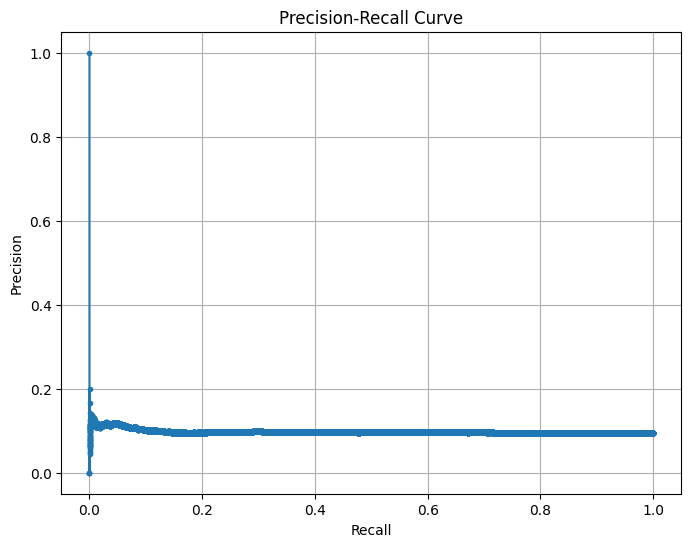


Logistic Regression - Credit Card Data:
Confusion Matrix:
 [[82357  2619]
 [   16   126]]
AUC-PR: 0.9620629834836546
F1 Score: 0.08728784205057152


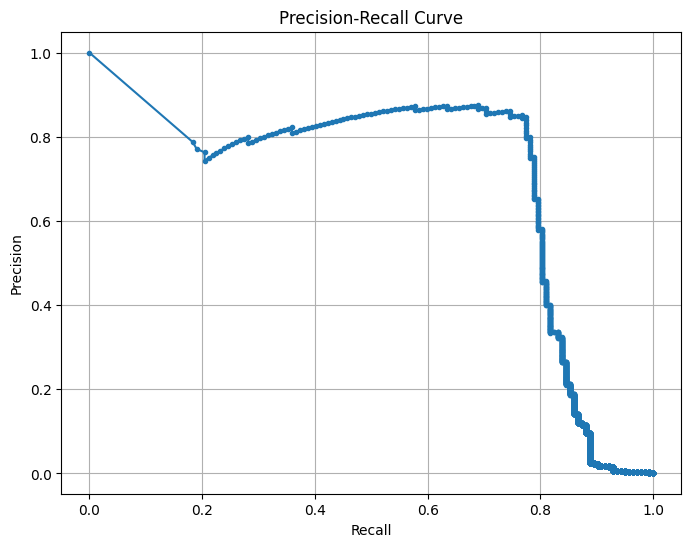


Random Forest - Fraud Data:
Confusion Matrix:
 [[37755     0]
 [ 1789  2110]]
AUC-PR: 0.771467238135046
F1 Score: 0.7022799134631387


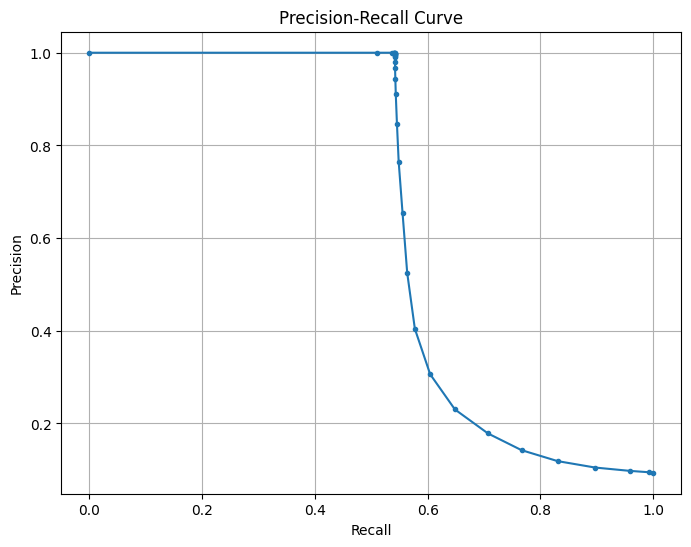


Random Forest - Credit Card Data:
Confusion Matrix:
 [[84972     4]
 [   41   101]]
AUC-PR: 0.9315914137148251
F1 Score: 0.8178137651821862


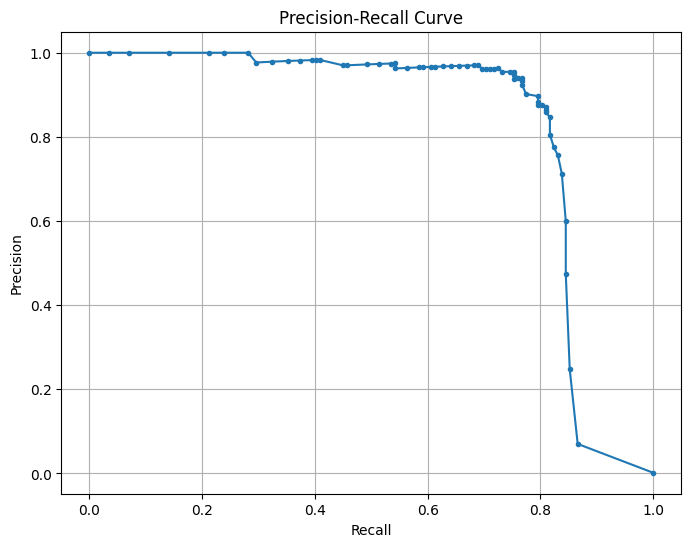

In [15]:
# Evaluate Logistic Regression
print("Logistic Regression - Fraud Data:")
evaluate_model(logistic_model_fraud, X_fraud_test, y_fraud_test)
print("\nLogistic Regression - Credit Card Data:")
evaluate_model(logistic_model_card, X_card_test, y_card_test)

# Evaluate Random Forest
print("\nRandom Forest - Fraud Data:")
evaluate_model(rf_model_fraud, X_fraud_test, y_fraud_test)
print("\nRandom Forest - Credit Card Data:")
evaluate_model(rf_model_card, X_card_test, y_card_test)

In [16]:
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve

# Assuming the model evaluation functions are already defined
# Evaluate Logistic Regression for both datasets
def evaluate_logistic(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    auc_pr = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    
    return auc_pr, f1

# Evaluate Random Forest for both datasets
def evaluate_rf(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    auc_pr = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    
    return auc_pr, f1

# Get metrics for Logistic Regression
logistic_auc_pr_fraud, logistic_f1_fraud = evaluate_logistic(logistic_model_fraud, X_fraud_test, y_fraud_test)
logistic_auc_pr_card, logistic_f1_card = evaluate_logistic(logistic_model_card, X_card_test, y_card_test)

# Get metrics for Random Forest
rf_auc_pr_fraud, rf_f1_fraud = evaluate_rf(rf_model_fraud, X_fraud_test, y_fraud_test)
rf_auc_pr_card, rf_f1_card = evaluate_rf(rf_model_card, X_card_test, y_card_test)

# Example of storing and printing results for justification:
results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Fraud Data AUC-PR': [logistic_auc_pr_fraud, rf_auc_pr_fraud],
    'Fraud Data F1 Score': [logistic_f1_fraud, rf_f1_fraud],
    'Credit Card Data AUC-PR': [logistic_auc_pr_card, rf_auc_pr_card],
    'Credit Card Data F1 Score': [logistic_f1_card, rf_f1_card],
}

results_df = pd.DataFrame(results)
print(results_df)

# Conclusion
best_model_fraud = 'Logistic Regression' if logistic_f1_fraud > rf_f1_fraud else 'Random Forest'
best_model_card = 'Logistic Regression' if logistic_f1_card > rf_f1_card else 'Random Forest'

print(f"\nBest Model for Fraud Data: {best_model_fraud}")
print(f"Best Model for Credit Card Data: {best_model_card}")

                 Model  Fraud Data AUC-PR  Fraud Data F1 Score  \
0  Logistic Regression           0.512064             0.158287   
1        Random Forest           0.771467             0.702280   

   Credit Card Data AUC-PR  Credit Card Data F1 Score  
0                 0.962063                   0.087288  
1                 0.931591                   0.817814  

Best Model for Fraud Data: Random Forest
Best Model for Credit Card Data: Random Forest


In [20]:
import joblib
import os

# Create a directory to save the models if it doesn't exist
model_directory = 'model'
os.makedirs(model_directory, exist_ok=True)

# Save the Logistic Regression models
joblib.dump(logistic_model_fraud, os.path.join(model_directory, 'logistic_regression_fraud.pkl'))
joblib.dump(logistic_model_card, os.path.join(model_directory, 'logistic_regression_card.pkl'))

# Save the Random Forest models
joblib.dump(rf_model_fraud, os.path.join(model_directory, 'random_forest_fraud.pkl'))
joblib.dump(rf_model_card, os.path.join(model_directory, 'random_forest_card.pkl'))

print("Models saved successfully!")

Models saved successfully!
